In [3]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow",tf.__version__)

tensorflow 2.0.0


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x,_),(test_x,_) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
print("max pixel : ",train_x.max())
print("min pixel : ",train_x.min())

max pixel :  255
min pixel :  0


### 데이터 전처리

In [8]:
train_x = (train_x - 127.5) / 127.5
print("max pixel : ",train_x.max())
print("min pixel : ",train_x.min())

max pixel :  1.0
min pixel :  -1.0


In [9]:
train_x = train_x.reshape(train_x.shape[0],28,28,1).astype('float32')
train_x.shape

(60000, 28, 28, 1)

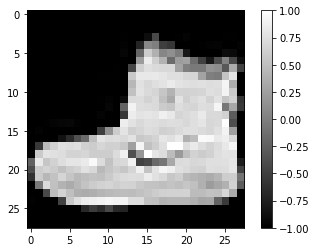

In [10]:
#첫번째 이미지가 꺼내보기
plt.imshow(train_x[0].reshape(28,28),cmap='gray')
plt.colorbar()
plt.show()

In [19]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [24]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Generator 구현하기

In [29]:
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((7, 7, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(1, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

In [30]:
generator = make_generator_model()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

In [32]:
noise = tf.random.normal([1,100])

In [33]:
generated_image = generator(noise,training=False)
generated_image.shape

TensorShape([1, 28, 28, 1])

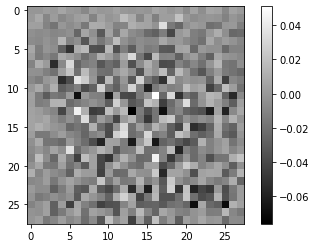

In [34]:
plt.imshow(generated_image[0,:,:,0],cmap='gray')
plt.colorbar()
plt.show()